In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('pumpkins.csv')


In [11]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('pumpkins.csv')

# Now you can use the variable `df`
# For example, to view the first few rows, you can use `head()`
print(df.head())


   City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0     

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Read the CSV file into a DataFrame
pumpkins = pd.read_csv('pumpkins.csv')

# Define the columns you want to keep
new_columns = ['Color', 'Origin', 'Item Size', 'Variety', 'City Name', 'Package']

# Drop columns not in new_columns
new_pumpkins = pumpkins[new_columns]

# Drop rows with any missing values
new_pumpkins.dropna(inplace=True)

# Apply LabelEncoder to transform categorical variables to numerical values
label_encoder = LabelEncoder()
for column in new_pumpkins.columns:
    new_pumpkins[column] = label_encoder.fit_transform(new_pumpkins[column])

# Display the modified DataFrame
print(new_pumpkins.head())


   Color  Origin  Item Size  Variety  City Name  Package
2      0       3          3        4          1        3
3      0      17          3        4          1        3
4      0       5          2        4          1        3
5      0       5          2        4          1        3
6      0       5          3        4          1        4


<ipython-input-16-aeaf03560f72>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pumpkins.dropna(inplace=True)
<ipython-input-16-aeaf03560f72>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pumpkins[column] = label_encoder.fit_transform(new_pumpkins[column])
<ipython-input-16-aeaf03560f72>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [17]:
new_pumpkins.info

<bound method DataFrame.info of       Color  Origin  Item Size  Variety  City Name  Package
2         0       3          3        4          1        3
3         0      17          3        4          1        3
4         0       5          2        4          1        3
5         0       5          2        4          1        3
6         0       5          3        4          1        4
...     ...     ...        ...      ...        ...      ...
1694      1       4          6        5         12        3
1695      1       4          6        5         12        3
1696      1       4          6        5         12        3
1697      1       4          6        5         12        3
1698      1       4          6        5         12        3

[991 rows x 6 columns]>

**Visualization - side-by-side grid**

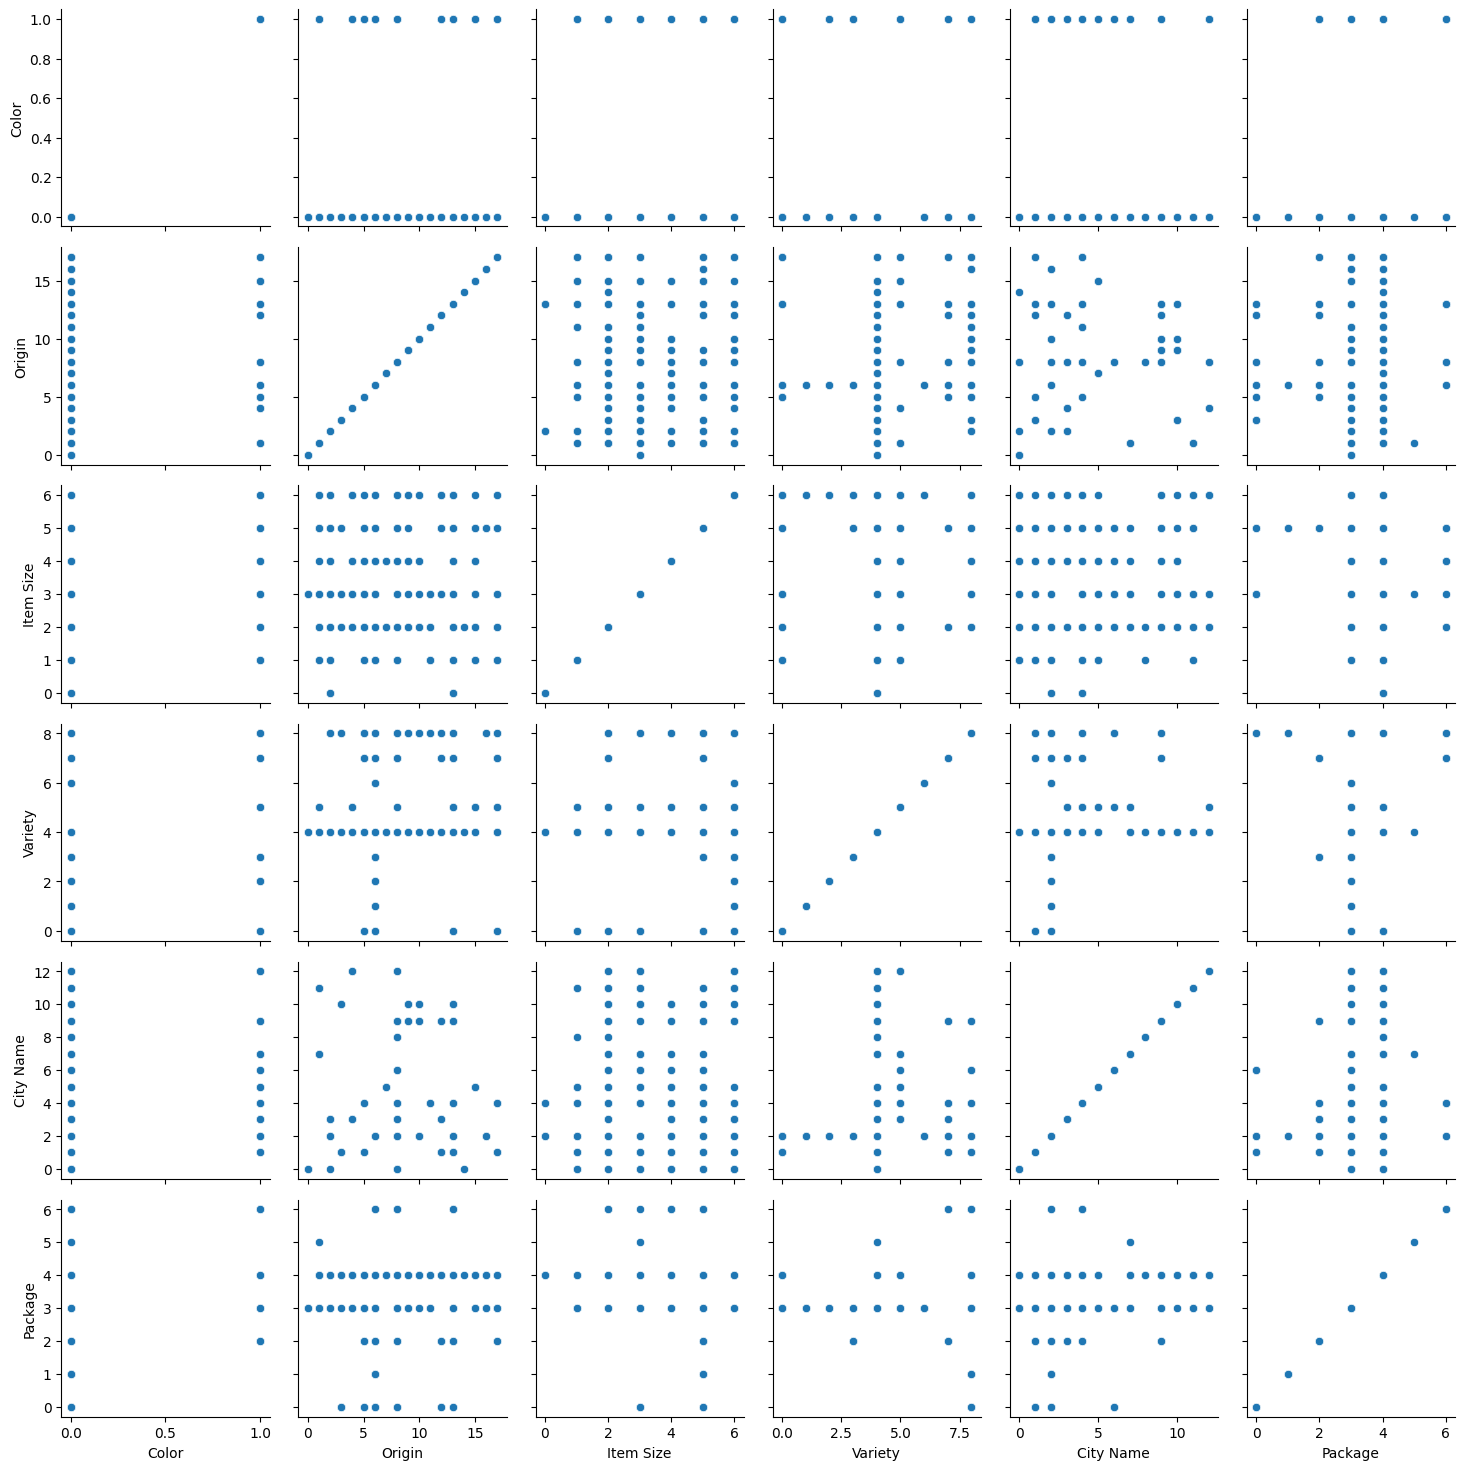

In [18]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)

**Use a swarm plot**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='Item Size'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


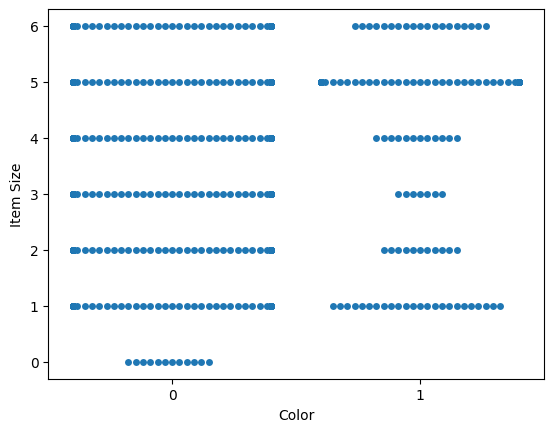

In [19]:
sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins)

**Violin plot**

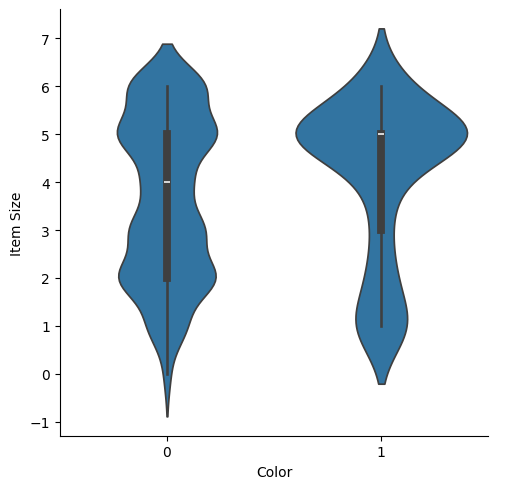

In [20]:
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins)

**Build your model**

1. Select the variables you want to use in your classification model and split the training and test sets calling train_test_split()

In [21]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


2. training the model, by calling fit() with your training data, and print out its result:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


Better comprehension via a confusion matrix

1. To use a confusion metrics, call confusion_matrix():

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]])

Visualize the ROC curve of this model

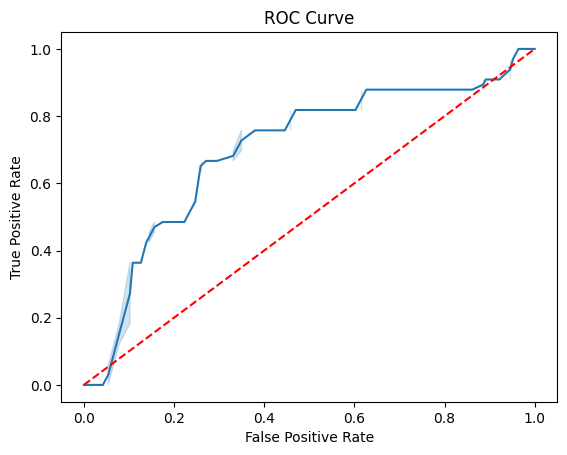

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# Plot the ROC curve
sns.lineplot(x=fpr, y=tpr)

# Add the diagonal line
sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--', color='red')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Finally, using Scikit-learn's roc_auc_score API to compute the actual 'Area Under the Curve' (AUC):

In [30]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6976998904709748


ASSIGNMENT


In [32]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Read the original data
pumpkins = pd.read_csv('pumpkins.csv')



In [37]:
# Step 2: Preprocess the data

# 1. Handling missing values:
# Example: Drop rows with missing values
pumpkins.dropna(inplace=True)

# 2. Encoding categorical variables:
# Example: One-hot encoding for categorical columns
pumpkins_encoded = pd.get_dummies(pumpkins, columns=['Color', 'Origin'])

# 3. Standardizing numerical features:
# Check if 'Weight' and 'Size' are present in the original DataFrame 'pumpkins'
if 'Weight' in pumpkins.columns and 'Size' in pumpkins.columns:
    # Standardize numerical columns using StandardScaler
    scaler = StandardScaler()
    numerical_cols = ['Weight', 'Size']
    pumpkins_encoded[numerical_cols] = scaler.fit_transform(pumpkins_encoded[numerical_cols])
else:
    print("Columns 'Weight' and/or 'Size' not found in the original DataFrame.")

# 4. Splitting data into features and target:
# Check if 'target_column' is present in the encoded DataFrame 'pumpkins_encoded'
if 'target_column' in pumpkins_encoded.columns:
    X = pumpkins_encoded.drop(columns=['target_column'])  # Adjust 'target_column' to the name of your target variable
    y = pumpkins_encoded['target_column']  # Adjust 'target_column' to the name of your target variable
else:
    print("Column 'target_column' not found in the encoded DataFrame.")


Columns 'Weight' and/or 'Size' not found in the original DataFrame.
Column 'target_column' not found in the encoded DataFrame.


In [38]:
# Step 3: Split data into training and testing sets

# Check if 'X' and 'y' are defined
if 'X' in locals() and 'y' in locals():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Data split successfully into training and testing sets.")
else:
    print("Data split failed. 'X' and/or 'y' are not defined. Please ensure Step 2 is completed successfully.")


Data split successfully into training and testing sets.


In [39]:
# Step 4: Build and train the Logistic Regression model

# Check if 'X_train' and 'y_train' are defined
if 'X_train' in locals() and 'y_train' in locals():
    # Initialize the Logistic Regression model
    model = LogisticRegression()

    # Train the model
    model.fit(X_train, y_train)
    print("Logistic Regression model trained successfully.")
else:
    print("Model training failed. 'X_train' and/or 'y_train' are not defined. Please ensure Step 3 is completed successfully.")


Logistic Regression model trained successfully.


In [40]:
# Step 5: Evaluate the model

# Check if 'X_test' and 'y_test' are defined
if 'X_test' in locals() and 'y_test' in locals():
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Print classification report for more detailed evaluation
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
else:
    print("Model evaluation failed. 'X_test' and/or 'y_test' are not defined. Please ensure Step 3 is completed successfully.")


Accuracy: 0.7839195979899497
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       157
           1       0.00      0.00      0.00        42

    accuracy                           0.78       199
   macro avg       0.39      0.50      0.44       199
weighted avg       0.62      0.78      0.69       199

